# Importnant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
# Load Dataset
file_path = "/content/Python Project Data - Supermarket Sales.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [5]:
df.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


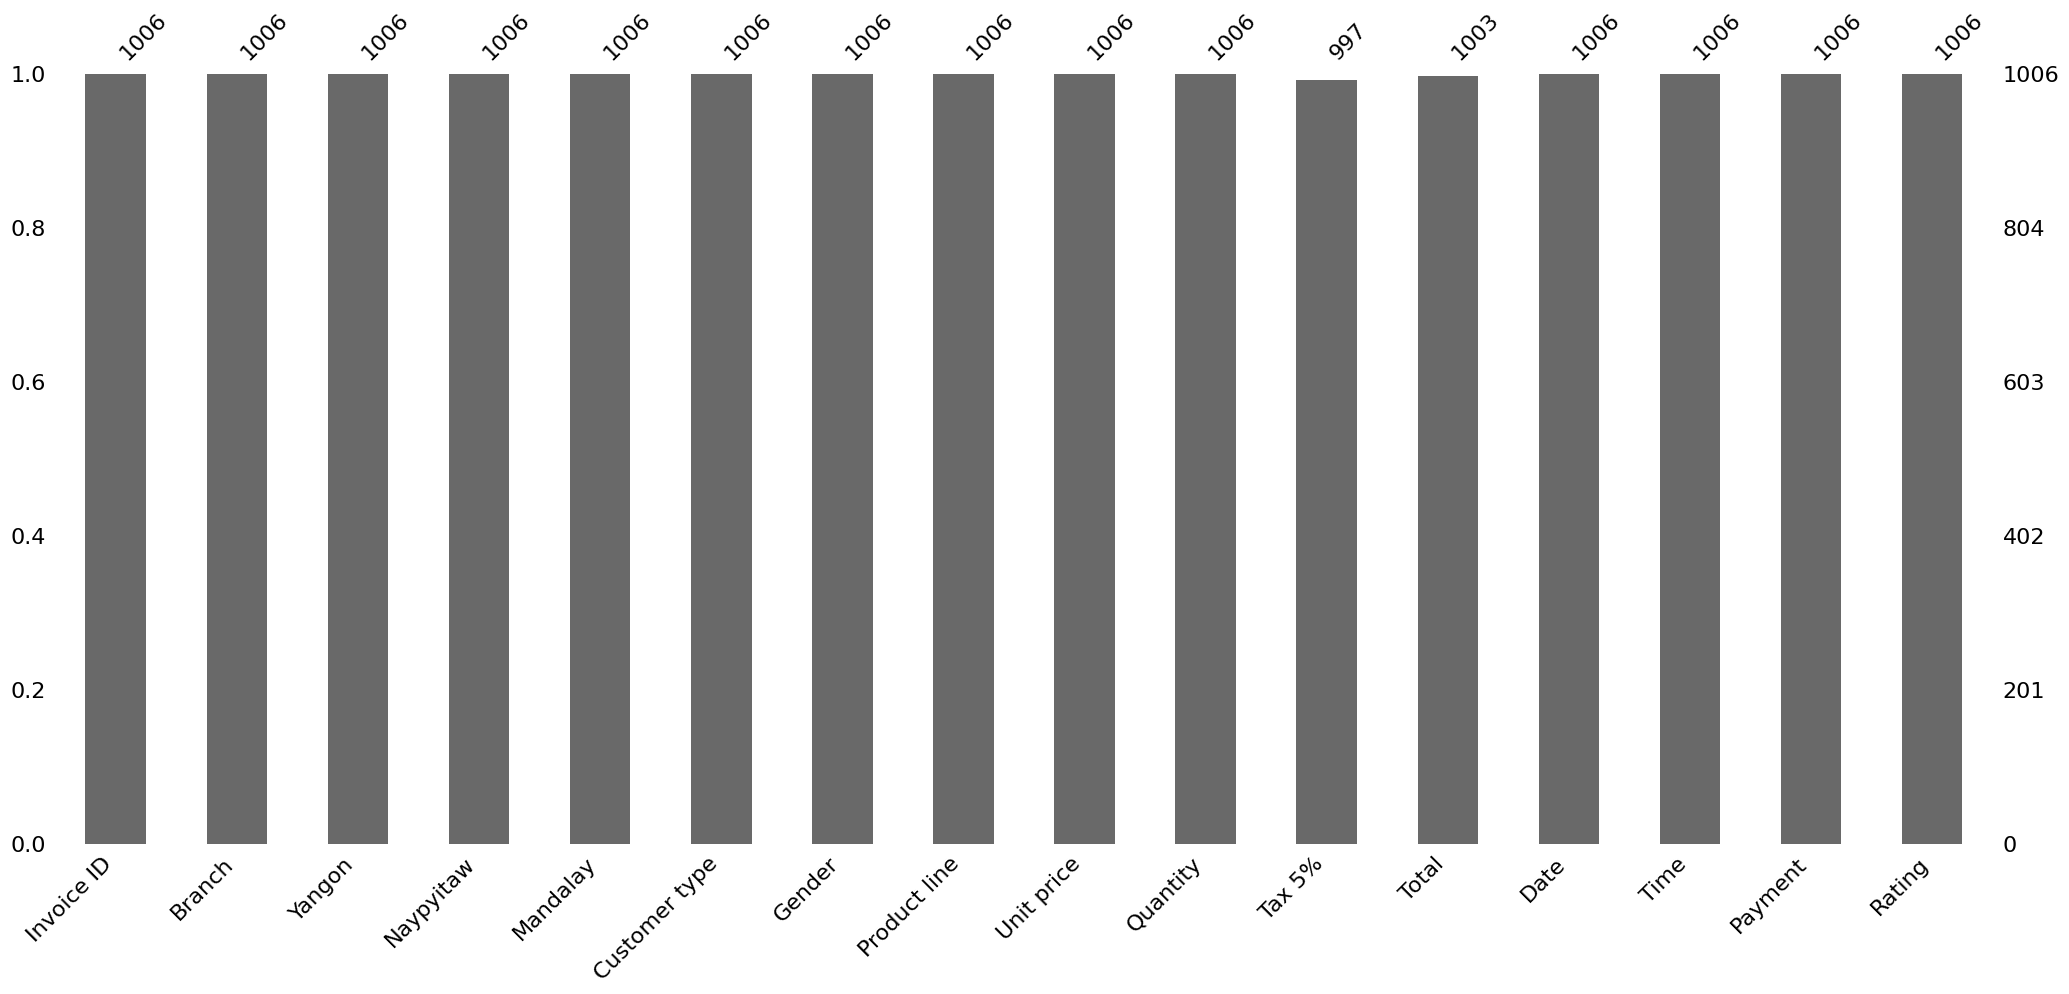

In [6]:
# Check for Missing Values
msno.bar(df)
plt.show()

In [8]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Tax 5%    9
Total     3
dtype: int64


In [26]:
df.dropna(inplace=True)
print(df.isnull().sum())

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


The previous analysis indicates that some columns, such as 'Tax 5%' and 'Total,' contain missing values.

In [9]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 6


In [27]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [11]:
# Data Transformation - Convert categorical variables to category dtype
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Invoice ID     1006 non-null   category
 1   Branch         1006 non-null   category
 2   Yangon         1006 non-null   int64   
 3   Naypyitaw      1006 non-null   int64   
 4   Mandalay       1006 non-null   int64   
 5   Customer type  1006 non-null   category
 6   Gender         1006 non-null   category
 7   Product line   1006 non-null   category
 8   Unit price     1006 non-null   category
 9   Quantity       1006 non-null   int64   
 10  Tax 5%         997 non-null    float64 
 11  Total          1003 non-null   float64 
 12  Date           1006 non-null   category
 13  Time           1006 non-null   category
 14  Payment        1006 non-null   category
 15  Rating         1006 non-null   float64 
dtypes: category(9), float64(3), int64(4)
memory usage: 170.4 KB


# Exploratory Data Analysis (EDA)

##### Distribution of Numerical Features


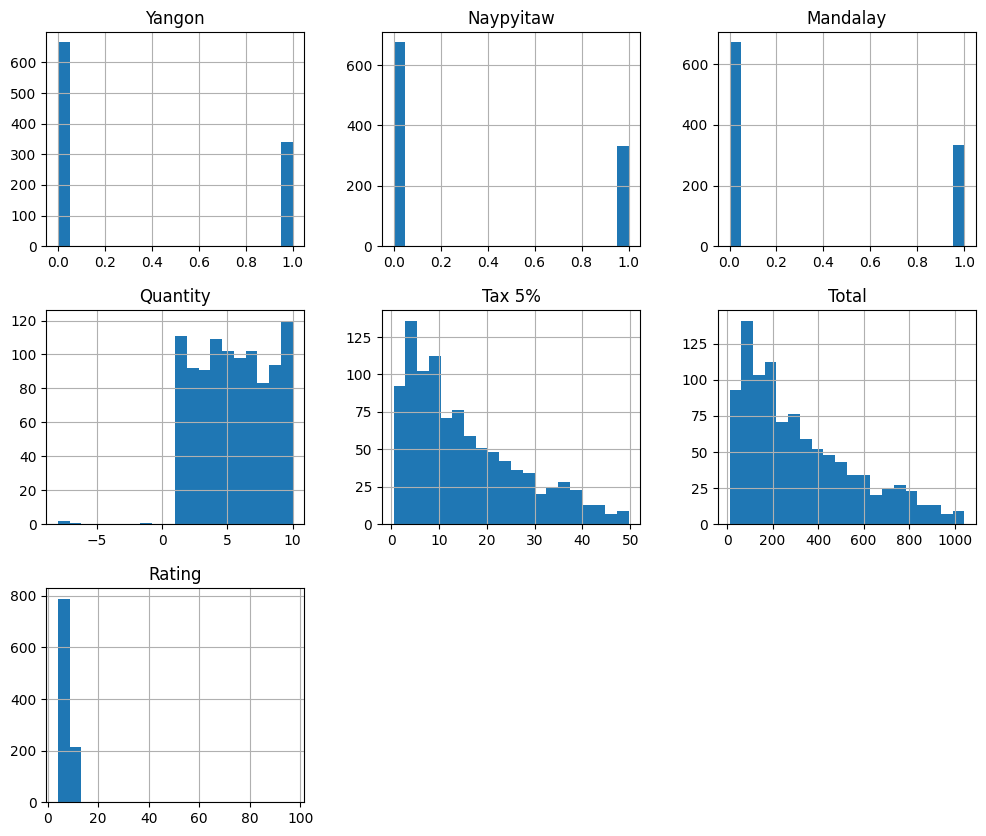

In [17]:
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.show()

#### Sales Trends Over Time

<ipython-input-19-51f4de40e982>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = df.groupby('Date')['Total'].sum()


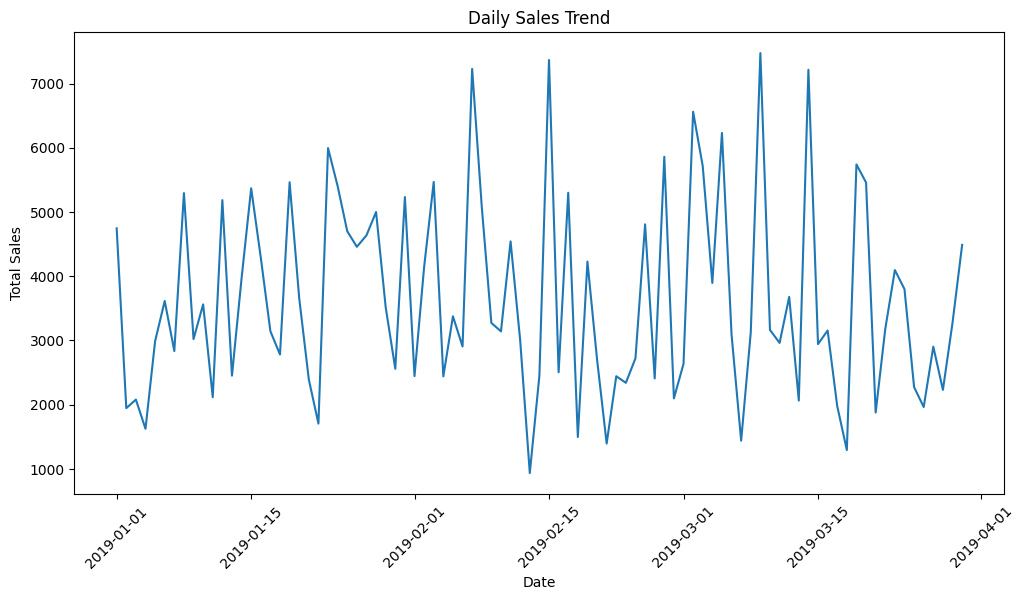

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-f9071d6715e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette={'Female': 'pink', 'Male': 'blue'})


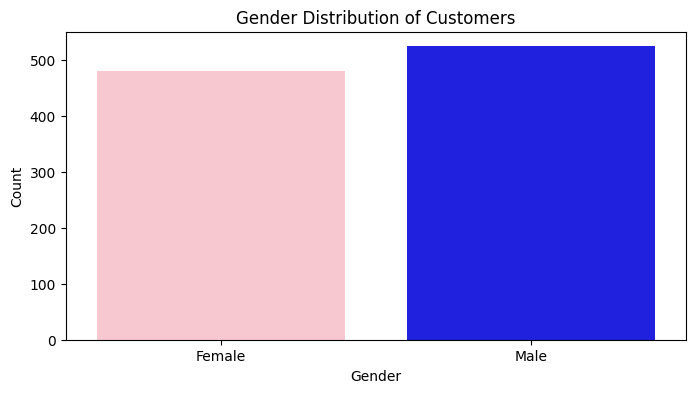

In [21]:
## Customer Demographics Analysis
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Gender'], palette={'Female': 'pink', 'Male': 'blue'})
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


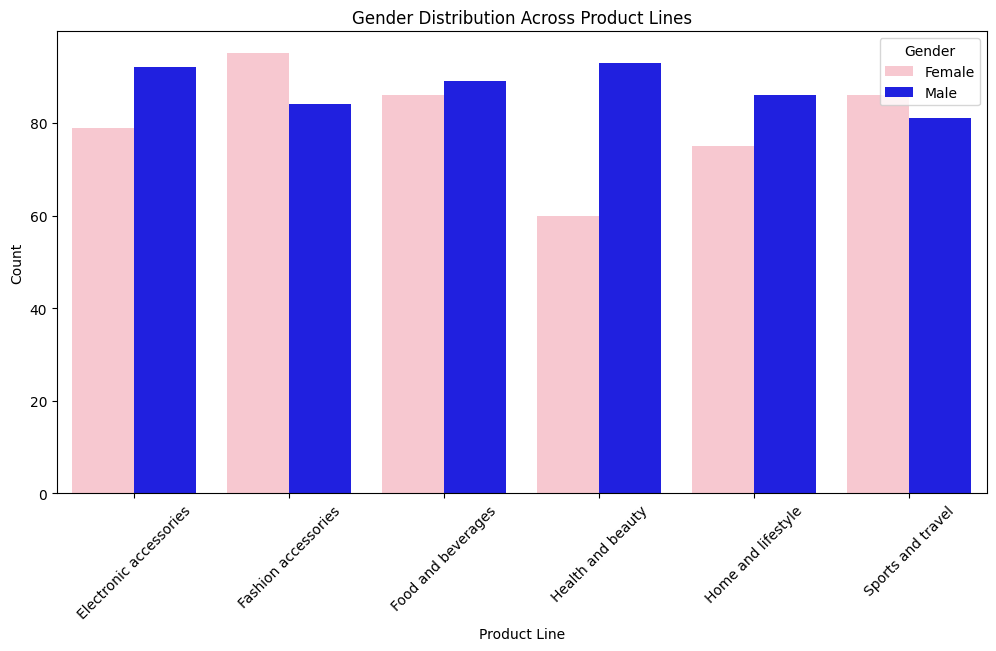

In [22]:
## Gender Distribution Across Product Lines
plt.figure(figsize=(12, 6))
sns.countplot(x='Product line', hue='Gender', data=df, palette={'Female': 'pink', 'Male': 'blue'})
plt.title("Gender Distribution Across Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


### Conclusion  

From the analysis, we observe that male customers are more frequent than female customers overall.  
However, female customers tend to purchase more in the **Accessories and Fashion**, **Sports and Travel** categories.  
On the other hand, male customers dominate purchases in **Electronics**, **Food and Travel**, **Health and Beauty**, and **Home and Lifestyle** product lines.  


In [28]:
df.to_csv('cleaned_supermarket_sales.csv', index=False)
